In [1]:
push!(LOAD_PATH,"C:/JMB/DINEOF.jl/src","."); using DINEOF
using PyPlot

┌ Info: Recompiling stale cache file C:\Users\jmbeckers\.julia\compiled\v1.2\DINEOF.ji for DINEOF [top-level]
└ @ Base loading.jl:1240


In [2]:
?DINEOF_fuse!

search: DINEOF_fuse!



```
  DINEOF_fuse!(X,XA,smoothiterations=4)
```

# In place fusion of X and XA.

X is modified in place such that where X is NaN it takes the value found in XA. To smooth the transition between the two fields weighting function can be used, with 1 in NaN locations of X propagated by box averaging

# Input:

  * `X`: an NDimensional array of original data with NaN at missing points
  * `XA` : an NDimensional array which contains the analysed field (the EOF reconstruction) at all points (present and absent points). It might still contain NaN if XA is on a real grid and containes topologically masked points (or points with not enough data during reconstructions). Those NaNs will be imprinted on X.
  * `smoothiterations` : number of times a box filter is applied on the weights (starting with 1 in NaN positions and 0 elsewhere)

# Output:

in place modification of X


X = [33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 NaN 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.

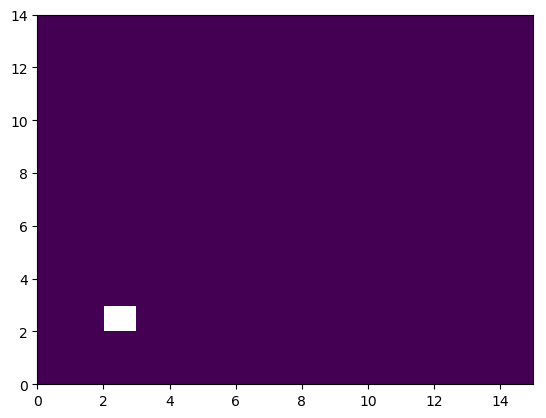

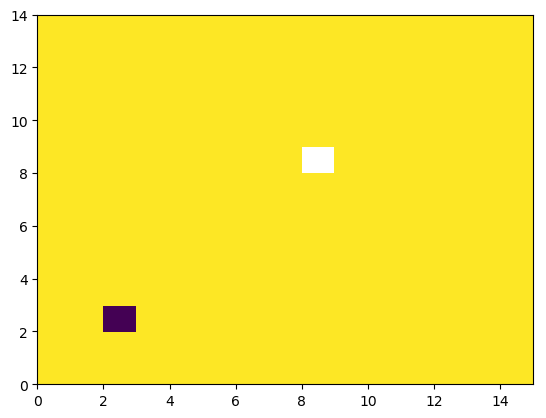

X = [33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 -9.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 NaN 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.

PyObject <matplotlib.collections.PolyCollection object at 0x0000000033E7B208>

In [3]:
X=33.0 .*ones(14,15)
XA=-9.0 .*ones(14,15)

X[3,3]=NaN
XA[9,9]=NaN
@show X
pcolor(X)
figure()
DINEOF_fuse!(X,XA,0)
@show X
pcolor(X)

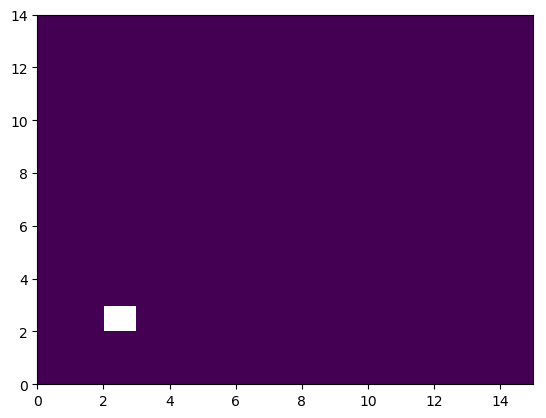

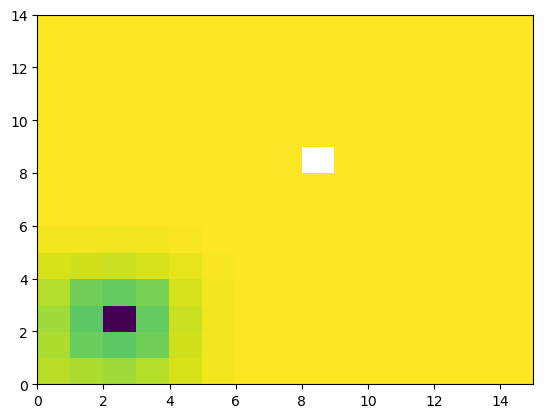

X = [33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 NaN 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0; 33.0 33.

PyObject <matplotlib.collections.PolyCollection object at 0x0000000034EEF550>

In [4]:
X=33.0 .*ones(14,15)
XA=-9.0 .*ones(14,15)

X[3,3]=NaN
XA[9,9]=NaN
@show X
pcolor(X)
figure()
DINEOF_fuse!(X,XA,4)
@show X
pcolor(X)